In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
data = load_boston()

In [3]:
print(data.keys())

['data', 'feature_names', 'DESCR', 'target']


In [4]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
feature_names = data.feature_names
print(feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
X = data.data
y = data.target
N, d = X.shape
print( N, d)

506 13


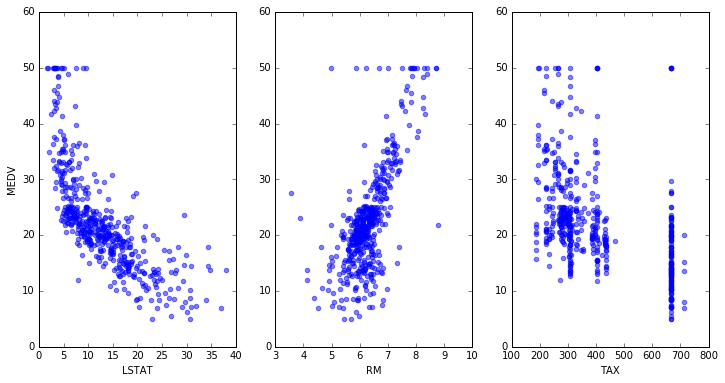

In [7]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 12], y, color = 'blue', alpha = 0.5)
plt.xlim([0, 40])
plt.xlabel(feature_names[12])
plt.ylabel('MEDV')

plt.subplot(1, 3, 2)
plt.scatter(X[:, 5], y, color = 'blue', alpha = 0.5)
plt.xlabel(feature_names[5])

plt.subplot(1, 3, 3)
plt.scatter(X[:, 9], y, color = 'blue', alpha = 0.5)
plt.xlabel(feature_names[9])

In [8]:
S = np.corrcoef(X, rowvar = 0)
print(S)

[[ 1.         -0.19945796  0.4044707  -0.05529526  0.41752143 -0.21993979
   0.35078366 -0.3779036   0.62202891  0.57956428  0.28825016 -0.37736462
   0.45222028]
 [-0.19945796  1.         -0.53382819 -0.04269672 -0.51660371  0.31199059
  -0.56953734  0.66440822 -0.31194783 -0.31456332 -0.39167855  0.17552032
  -0.41299457]
 [ 0.4044707  -0.53382819  1.          0.06293803  0.76365145 -0.39167585
   0.64477851 -0.70802699  0.59512927  0.72076018  0.38324756 -0.35697654
   0.60379972]
 [-0.05529526 -0.04269672  0.06293803  1.          0.09120281  0.09125123
   0.08651777 -0.09917578 -0.00736824 -0.03558652 -0.12151517  0.04878848
  -0.0539293 ]
 [ 0.41752143 -0.51660371  0.76365145  0.09120281  1.         -0.30218819
   0.7314701  -0.76923011  0.61144056  0.6680232   0.18893268 -0.38005064
   0.59087892]
 [-0.21993979  0.31199059 -0.39167585  0.09125123 -0.30218819  1.
  -0.24026493  0.20524621 -0.20984667 -0.29204783 -0.35550149  0.12806864
  -0.61380827]
 [ 0.35078366 -0.56953734  0.6

In [9]:
S = np.corrcoef(np.hstack([X, np.reshape(y, (N, 1))]), rowvar = 0)
print(S)

[[ 1.         -0.19945796  0.4044707  -0.05529526  0.41752143 -0.21993979
   0.35078366 -0.3779036   0.62202891  0.57956428  0.28825016 -0.37736462
   0.45222028 -0.38583169]
 [-0.19945796  1.         -0.53382819 -0.04269672 -0.51660371  0.31199059
  -0.56953734  0.66440822 -0.31194783 -0.31456332 -0.39167855  0.17552032
  -0.41299457  0.36044534]
 [ 0.4044707  -0.53382819  1.          0.06293803  0.76365145 -0.39167585
   0.64477851 -0.70802699  0.59512927  0.72076018  0.38324756 -0.35697654
   0.60379972 -0.48372516]
 [-0.05529526 -0.04269672  0.06293803  1.          0.09120281  0.09125123
   0.08651777 -0.09917578 -0.00736824 -0.03558652 -0.12151517  0.04878848
  -0.0539293   0.17526018]
 [ 0.41752143 -0.51660371  0.76365145  0.09120281  1.         -0.30218819
   0.7314701  -0.76923011  0.61144056  0.6680232   0.18893268 -0.38005064
   0.59087892 -0.42732077]
 [-0.21993979  0.31199059 -0.39167585  0.09125123 -0.30218819  1.
  -0.24026493  0.20524621 -0.20984667 -0.29204783 -0.355501

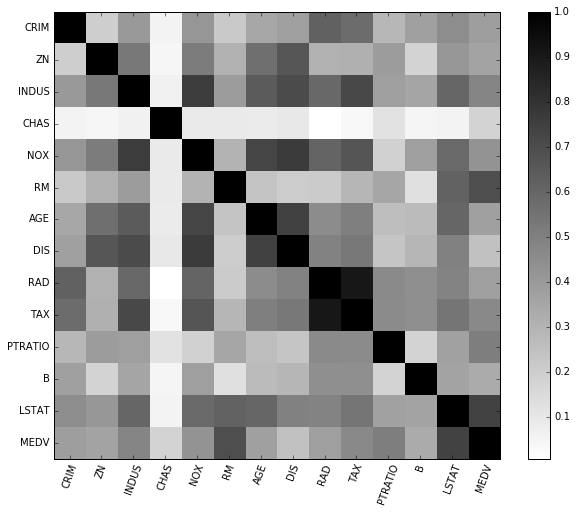

In [10]:
plt.figure(figsize = (10, 8))
plt.imshow(np.abs(S), interpolation = 'nearest', cmap = 'binary')
plt.colorbar()
plt.xticks(np.arange(d + 1), np.append(feature_names, 'MEDV'), rotation=70)
plt.yticks(np.arange(d + 1), np.append(feature_names, 'MEDV'))
pass

In [11]:
correlations = np.abs(S[:-1, -1])
indices = np.argsort(correlations)[:-(d + 1):-1]

(-1, 13L)

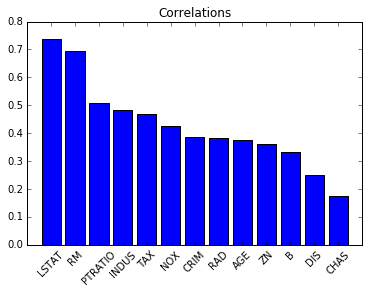

In [12]:
plt.title("Correlations")
plt.bar(range(d), correlations[indices], align = 'center', color = 'b')
plt.xticks(range(d), feature_names[indices], rotation = 45)
plt.xlim([-1, d])

In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)
N_train, = y_train.shape
N_test,  = y_test.shape
print(N_train, N_test)

379 127


In [14]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Измеряем точность и ошибку

_Остаточная сумма квадратов_:
$$
{\rm RSS} = \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$
где 
$$
\widehat{y}^{(i)} = \beta_0 + \sum_{j=1}^d \beta_j x_j^{(i)}
$$

_Полная сумма квадратов_:
$$
{\rm TSS} = \sum_{i=1}^N \left(y^{(i)} - \overline{y} \right)^2,
$$
где 
$$
\overline{y} = \frac{1}{N} \sum_{i=1}^N y^{(i)}
$$

$$
\overline{y} = \beta_0 + \sum_{j=1}^d \beta_j \overline{x}_j
$$


_Сумма квадратов, обусловленная регрессией_:
$$
{\rm ESS} = \sum_{i=1}^N \left(\overline{y} - \widehat{y}^{(i)} \right)^2
$$

Можно показать, что
$$
{\rm TSS} = {\rm RSS} + {\rm ESS}
$$

_Коэффициент детерминации_, или _коэффициент регрессии Пирсона_:
$$
R^2 = 1 - \frac{{\rm RSS}}{{\rm TSS}} = \frac{{\rm ESS}}{{\rm TSS}}
$$
— доля объясняемого регрессией разброса относительно среднего.

$$
0 \le R^2 \le 1
$$

$R = \sqrt{R^2}$ равно (по модулю) выборочной корреляции между $y^{(i)}$ и $\widehat{y}^{(i)}$

Если $d = 1$, то $R$ равен (по модулю) выборочной корреляции между $y^{(i)}$ и $x^{(i)}$.

In [15]:
lr_model.score(X_train, y_train) # Коэффициент детерминации

0.73745399110689847

In [16]:
lr_model.score(X_test, y_test)

0.73142491282820998

In [17]:
MSE_train = np.mean((lr_model.predict(X_train) - y_train)**2)
MSE_test  = np.mean((lr_model.predict(X_test ) - y_test)**2)
print(MSE_train, MSE_test)

20.5546440362 26.9470851444


# Отбор и определение значимости признаков

## Отбор признаков. Величина коэффициентов

In [18]:
lr_model.coef_

array([ -1.17768886e-01,   5.05346579e-02,  -1.02686589e-02,
         3.66706342e+00,  -1.53354861e+01,   3.38520837e+00,
        -5.81736820e-03,  -1.49248101e+00,   3.33155833e-01,
        -1.50532803e-02,  -8.70584084e-01,   8.91207776e-03,
        -4.93857793e-01])

In [19]:
X /= X.std(axis = 0) # Сделаем стандартизацию!
lr_model.fit(X, y)
lr_model.coef_

array([-0.92041113,  1.08098058,  0.14296712,  0.68220346, -2.06009246,
        2.67064141,  0.02112063, -3.10444805,  2.65878654, -2.07589814,
       -2.06215593,  0.85664044, -3.74867982])

In [20]:
importances = np.abs(lr_model.coef_)
indices = np.argsort(importances)[:-(d + 1):-1]

(-1, 13L)

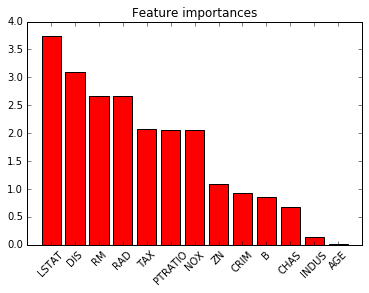

In [21]:
plt.title("Feature importances")
plt.bar(range(d), importances[indices], align = 'center', color = 'r')
plt.xticks(range(d), feature_names[indices], rotation = 45)
plt.xlim([-1, d])

## Отбор признаков. Recursive forward selection

Recursive feature selection (greedy forward selection)

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [23]:
kbest_model = SelectKBest(f_regression, k = 5)
kbest_model.fit(X_train, y_train)
X_train_new = kbest_model.transform(X_train)
X_test_new  = kbest_model.transform(X_test)
print(X_train_new.shape, X_test_new.shape)

(379L, 5L) (127L, 5L)


In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
lr_model.score(X_train_new, y_train)

0.66961443015481614

In [26]:
lr_model.score(X_test_new, y_test)

0.69097970794677988

In [27]:
y_train_pred = lr_model.predict(X_train_new)
np.mean((y_train_pred - y_train)**2)

25.86578181661665

In [28]:
y_test_pred = lr_model.predict(X_test_new)
np.mean((y_test_pred - y_test)**2)

31.005095107701379

In [29]:
y_train_mean = np.mean(y_train)
print(np.var(y_train))
print(np.mean((y_train_mean - y_train)**2))
print(np.mean((y_train_mean - y_test)**2))

78.2896838646
78.2896838646
103.509862808


In [30]:
err_train = [np.mean((y_train_mean - y_train)**2)]
err_test  = [np.mean((y_train_mean - y_test)**2)]
for k in range(1, d + 1):
    kbest_model = SelectKBest(f_regression, k = k)
    kbest_model.fit(X_train, y_train)
    X_train_new = kbest_model.transform(X_train)
    X_test_new  = kbest_model.transform(X_test)
    
    lr_model = LinearRegression()
    lr_model.fit(X_train_new, y_train)
    
    y_train_pred = lr_model.predict(X_train_new)
    err_train.append(np.mean((y_train_pred - y_train)**2))
    
    y_test_pred = lr_model.predict(X_test_new)
    err_test.append(np.mean((y_test_pred - y_test)**2))

In [31]:
k_opt = np.argmin(err_test)
print(k_opt, err_test[k_opt])

12 26.5040219079


(15, 110)

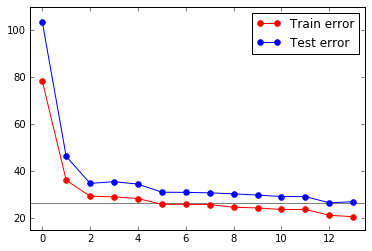

In [32]:
plt.axhline(err_test[k_opt], color = 'gray')
plt.plot(range(d + 1), err_train, 'o-r', label = 'Train error', markeredgecolor = 'r')
plt.plot(range(d + 1), err_test,  'o-b', label = 'Test error',  markeredgecolor = 'b')
plt.legend(loc = 1)
plt.xlim(-0.5, 13.5)
plt.ylim(15, 110)

## Отбор признаков. Recursive feature elimination

 Recursive feature elimination (greedy backward elimination)

In [33]:
from sklearn.feature_selection import RFECV

lr_model = LinearRegression()
selector = RFECV(lr_model, cv = 5)
selector.fit(X, y)
print(feature_names[selector.support_] )
print(selector.ranking_)
print(selector.n_features_)

['CRIM' 'ZN' 'CHAS' 'NOX' 'RM' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']
[1 1 2 1 1 1 3 1 1 1 1 1 1]
11


In [34]:
print(feature_names[2], feature_names[6] )

INDUS AGE


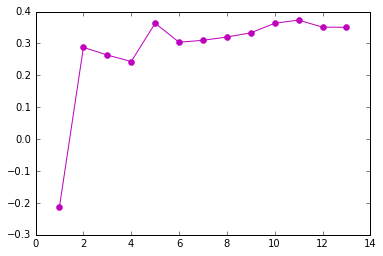

In [35]:
plt.plot(np.arange(1, d + 1), selector.grid_scores_, 'mo-', markeredgecolor = 'm')

# Ridge-регрессия 

Ridge-регрессия – $L_2$-регуляризация:

$$
\sum_{i=1}^N \left(y^{(i)} - \beta_0 - \sum_{j=1}^d \beta_j x_j^{(i)} \right)^2
+ \alpha \sum_{i=1}^N \beta_j^2
\to \min
$$

$\alpha > 0$


In [36]:
from sklearn import linear_model
ridge_model = linear_model.Ridge(alpha = 0.1)
ridge_model.fit(X_train, y_train)
ridge_model.predict(X)
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

0.737396616708
0.730731790421


In [45]:
np.logspace(0, 7, 8)

array([  1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03,   1.00000000e+04,   1.00000000e+05,
         1.00000000e+06,   1.00000000e+07])

In [37]:
alphas = np.logspace(0, 7, 200)
coefs = []
for alpha in alphas:
    ridge_model = linear_model.Ridge(alpha = alpha, fit_intercept = False)
    ridge_model.fit(X, y)
    coefs.append(ridge_model.coef_)

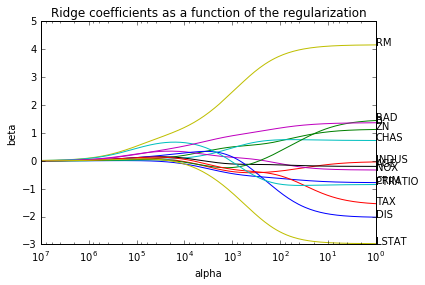

In [46]:
plt.semilogx(alphas, coefs)
plt.xlim(plt.xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('beta')
plt.title('Ridge coefficients as a function of the regularization')

for j, feature_name in enumerate(feature_names):
    plt.text(alphas[0], coefs[0][j], feature_name)

#### Ridge CV

In [39]:
ridgeCV_model = linear_model.RidgeCV(alphas = np.logspace(-4,3,20), store_cv_values=True)
ridgeCV_model.fit(X, y)

RidgeCV(alphas=array([  1.00000e-04,   1.38950e-04,   1.93070e-04,   2.68270e-04,
         3.72759e-04,   5.17947e-04,   7.19686e-04,   1.00000e-03,
         1.38950e-03,   1.93070e-03,   2.68270e-03,   3.72759e-03,
         5.17947e-03,   7.19686e-03,   1.00000e-02,   1.38950e-02,
         1.93070e-02,   2...     1.93070e+02,   2.68270e+02,   3.72759e+02,   5.17947e+02,
         7.19686e+02,   1.00000e+03]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [40]:
print(ridgeCV_model.alpha_)
print(ridgeCV_model.intercept_)
print(ridgeCV_model.coef_)

5.17947467923
34.6862849301
[-0.88129408  1.00926459  0.03545643  0.69760953 -1.92479181  2.71054074
 -0.00873559 -2.97096432  2.33146047 -1.77424417 -2.02190954  0.85404091
 -3.68381217]


In [41]:
ridgeCV_model

RidgeCV(alphas=array([  1.00000e-04,   1.38950e-04,   1.93070e-04,   2.68270e-04,
         3.72759e-04,   5.17947e-04,   7.19686e-04,   1.00000e-03,
         1.38950e-03,   1.93070e-03,   2.68270e-03,   3.72759e-03,
         5.17947e-03,   7.19686e-03,   1.00000e-02,   1.38950e-02,
         1.93070e-02,   2...     1.93070e+02,   2.68270e+02,   3.72759e+02,   5.17947e+02,
         7.19686e+02,   1.00000e+03]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [42]:
# ridgeCV_model.cv_values_ отсутствует
mse_mean  = np.mean(ridgeCV_model.cv_values_, axis = 1)
mse_std   = np.std (ridgeCV_model.cv_values_, axis = 1)
mse_min   = np.min(mse_mean)
alpha_min = ridgeCV_model.alphas[np.argmin(mse_mean)]
print(mse_min, alpha_min)

0.0170907278938 100.0


ValueError: Argument dimensions are incompatible

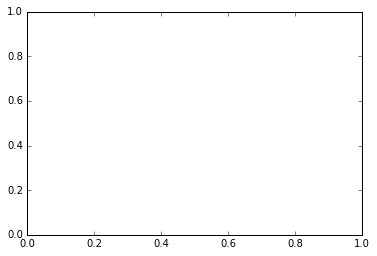

In [47]:
plt.fill_between(ridgeCV_model.alphas, mse_mean - mse_std, mse_mean + mse_std, 
                 alpha = 0.15, color = 'm')
plt.axhline(mse_min, color = 'gray', linestyle = '--')
plt.axvline(alpha_min, color = 'gray', linestyle = '--')
plt.semilogx(ridgeCV_model.alphas, mse_mean, color = 'm')

# LASSO 

LASSO (least absolute shrinkage and selection operator) - $L_1$-регуляризация:

$$
\frac{1}{2N} \sum_{i=1}^N \left(y^{(i)} - \beta_0 - \sum_{j=1}^d \beta_j x_j^{(i)} \right)^2
+ \alpha \sum_{i=1}^N |\beta_j|
\to \min
$$

Если $\alpha$ достаточно велико, то часть найденных коэффициентов $\beta_j$ в точности равны нулю.

In [48]:
lasso_model = linear_model.Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)
lasso_model.predict(X)
print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_test, y_test))

0.725221611857
0.716740128778


LAR – least angle regression

In [49]:
alphas, _, coefs = linear_model.lar_path(X, y, method = 'lasso') # Try method='lar'

xx = np.sum(np.abs(coefs), axis = 0)
xx /= xx[-1]

plt.plot(xx, coefs.T, '.-')
ymin, ymax = plt.ylim()
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')

for j, feature_name in enumerate(feature_names):
    plt.text(1, coefs[j, -1], feature_name)

AttributeError: 'module' object has no attribute 'lar_path'

#### Lasso CV

In [50]:
lassoCV_model = linear_model.LassoCV(alphas = np.logspace(-4, 1), cv = 5)
lassoCV_model.fit(X, y)

LassoCV(alphas=array([  1.00000e-04,   1.26486e-04,   1.59986e-04,   2.02359e-04,
         2.55955e-04,   3.23746e-04,   4.09492e-04,   5.17947e-04,
         6.55129e-04,   8.28643e-04,   1.04811e-03,   1.32571e-03,
         1.67683e-03,   2.12095e-03,   2.68270e-03,   3.39322e-03,
         4.29193e-03,   5...     3.08884e+00,   3.90694e+00,   4.94171e+00,   6.25055e+00,
         7.90604e+00,   1.00000e+01]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [51]:
print(lassoCV_model.alpha_)
print(lassoCV_model.intercept_)
print(lassoCV_model.coef_)

0.14563484775
26.5826240094
[-0.49098165  0.53837854 -0.05800926  0.6464781  -1.36094477  2.89306136
 -0.         -2.10703811  0.52770186 -0.28841035 -1.8616515   0.72640154
 -3.72371586]


In [52]:
feature_names[[3,4,6]]

array(['CHAS', 'NOX', 'AGE'], 
      dtype='|S7')

In [53]:
mse_mean  = np.mean(lassoCV_model.mse_path_, axis = 1)
mse_std   = np.std (lassoCV_model.mse_path_, axis = 1)
mse_min   = np.min(mse_mean)
alpha_min = lassoCV_model.alphas_[np.argmin(mse_mean)]
print(mse_min, alpha_min)

35.4984006757 0.14563484775


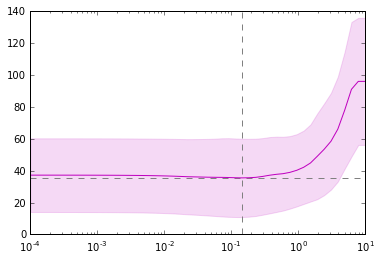

In [54]:
plt.fill_between(lassoCV_model.alphas_, mse_mean - mse_std, mse_mean + mse_std, 
                 alpha = 0.15, color = 'm')
plt.axhline(mse_min, color = 'gray', linestyle = '--')
plt.axvline(alpha_min, color = 'gray', linestyle = '--')
plt.semilogx(lassoCV_model.alphas_, mse_mean, color = 'm')